In [1]:
import numpy as np 
import pandas as pd 
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px 
from matplotlib import pyplot
from pandas.plotting import lag_plot
import json
from sklearn.preprocessing import LabelEncoder #To Encoding
import missingno as msno #Visualisation Matrix NaNs

In [2]:
def downloader():
    world = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
    print(world["date"][-1:])
    return world 

In [3]:

world = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
world['date']= pd.to_datetime(world['date'])
gbr = world[world["iso_code"]=="GBR"]
prt = world[world["iso_code"]=="PRT"]
ven = world[world["iso_code"]=="VEN"]
tur = world[world["iso_code"]=="TUR"]
esp = world[world["iso_code"]=="ESP"]
print(world.info())
world

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62047 entries, 0 to 62046
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               61694 non-null  object        
 1   continent                              61325 non-null  object        
 2   location                               62047 non-null  object        
 3   date                                   62047 non-null  datetime64[ns]
 4   total_cases                            61450 non-null  float64       
 5   new_cases                              61443 non-null  float64       
 6   new_cases_smoothed                     60484 non-null  float64       
 7   total_deaths                           52913 non-null  float64       
 8   new_deaths                             52912 non-null  float64       
 9   new_deaths_smoothed                    60484 non-null  float6

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62042,ZWE,Africa,Zimbabwe,2021-01-20,29408.0,733.0,736.000,879.0,54.0,41.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
62043,ZWE,Africa,Zimbabwe,2021-01-21,30047.0,639.0,668.429,917.0,38.0,40.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
62044,ZWE,Africa,Zimbabwe,2021-01-22,30523.0,476.0,630.571,962.0,45.0,42.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
62045,ZWE,Africa,Zimbabwe,2021-01-23,31007.0,484.0,589.429,974.0,12.0,41.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


<AxesSubplot:>

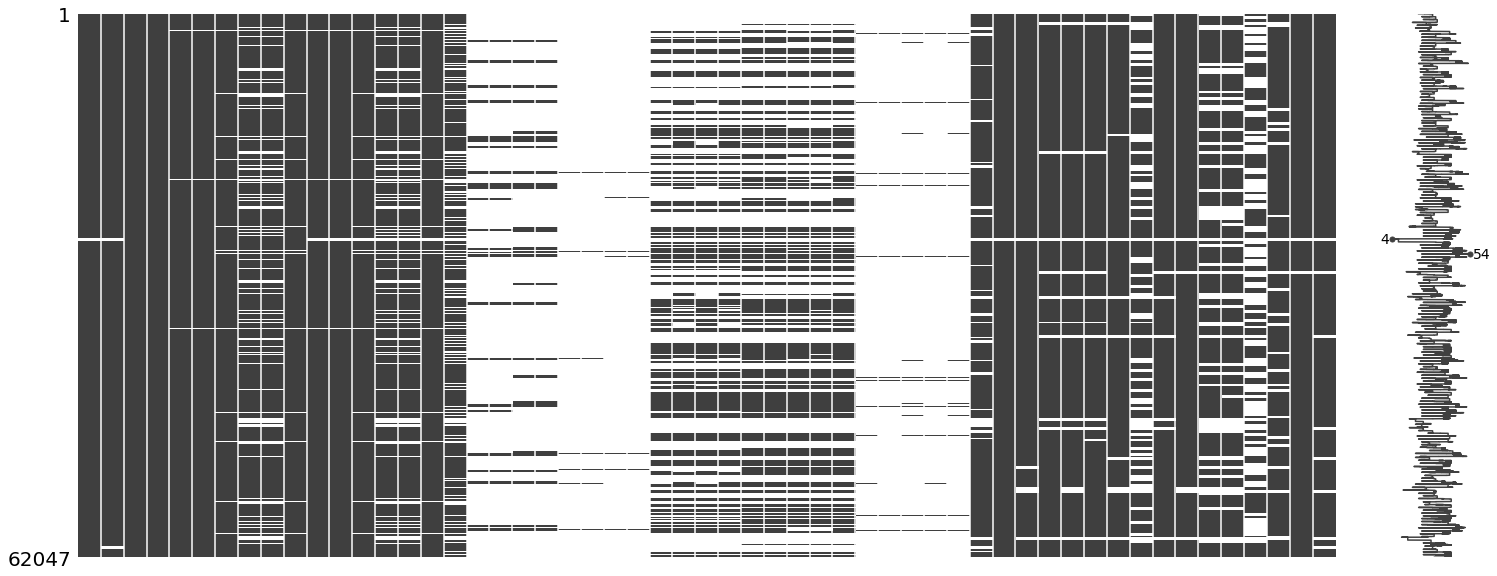

In [4]:
msno.matrix(world)

In [5]:
world.isnull().sum()

iso_code                                   353
continent                                  722
location                                     0
date                                         0
total_cases                                597
new_cases                                  604
new_cases_smoothed                        1563
total_deaths                              9134
new_deaths                                9135
new_deaths_smoothed                       1563
total_cases_per_million                    950
new_cases_per_million                      957
new_cases_smoothed_per_million            1911
total_deaths_per_million                  9474
new_deaths_per_million                    9475
new_deaths_smoothed_per_million           1911
reproduction_rate                        13291
icu_patients                             55191
icu_patients_per_million                 55191
hosp_patients                            53933
hosp_patients_per_million                53933
weekly_icu_ad

In [2]:
paises = ['GBR', 'PRT', 'VEN', 'TUR', 'ESP']
df = world[world["iso_code"].isin(paises)]
df = df.dropna(subset=["total_deaths"])
df 

NameError: name 'world' is not defined

<AxesSubplot:>

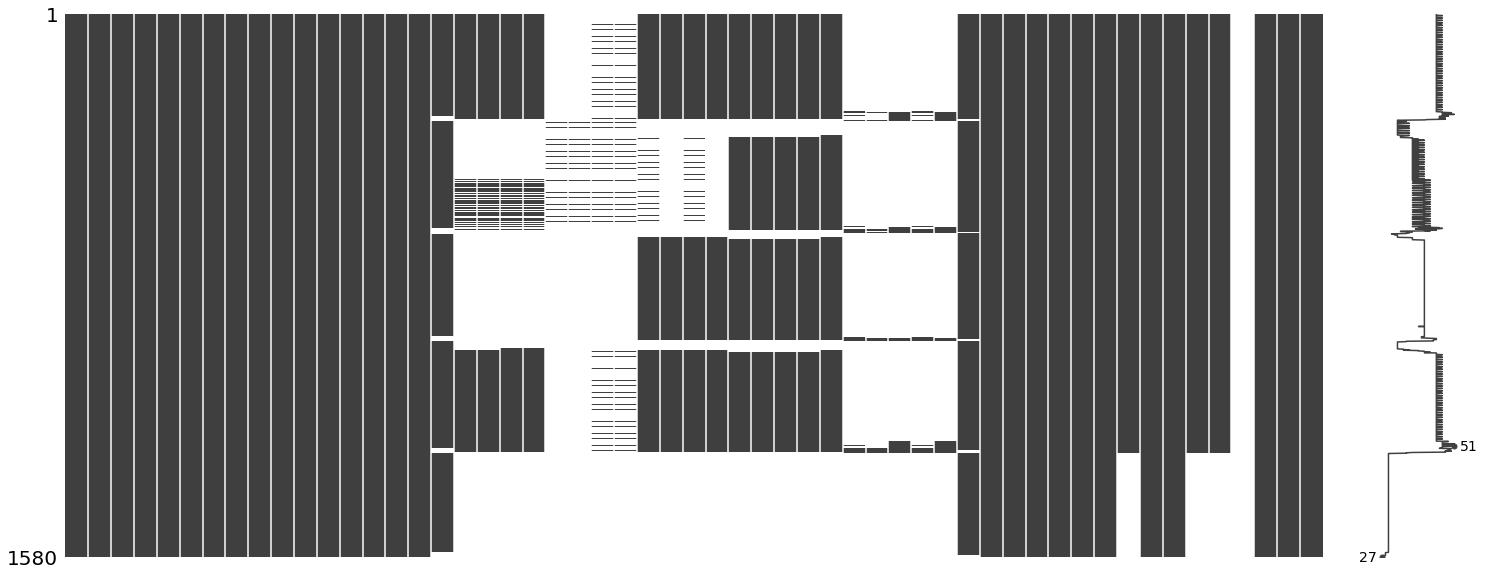

In [8]:
msno.matrix(df)

In [9]:
t_d_averages = df.groupby(by="date" ).agg({'total_deaths':'mean'})
t_d_averages= t_d_averages.reset_index()
t_d_averages = t_d_averages['date'].astype(str)
t_d_averages = t_d_averages.values.tolist()
t_d_averages 
jsonpaalex = {"t_d_averages":t_d_averages}


NameError: name 'df' is not defined

In [11]:
with open("t_d_averages.json", "w") as write_file:
    json.dump(jsonpaalex, write_file)


In [132]:
gbr1_0 = gbr.drop(gbr.columns.difference(["iso_code","date",'total_cases',"total_deaths", 'total_deaths_per_million']), 1)
prt1_0 = prt.drop(prt.columns.difference(["iso_code","date",'total_cases',"total_deaths", 'total_deaths_per_million']), 1)
ven1_0 = ven.drop(ven.columns.difference(["iso_code","date",'total_cases',"total_deaths", 'total_deaths_per_million']), 1)
tur1_0 = tur.drop(tur.columns.difference(["iso_code","date",'total_cases',"total_deaths", 'total_deaths_per_million']), 1)
esp1_0 = esp.drop(esp.columns.difference(["iso_code","date",'total_cases',"total_deaths", 'total_deaths_per_million']), 1)

In [133]:
gbr1_0.dropna( inplace= True)
prt1_0.dropna( inplace= True)
ven1_0.dropna( inplace= True)
tur1_0.dropna( inplace= True)
esp1_0.dropna( inplace= True)

In [134]:
print(gbr1_0.corr())
prt1_0.corr()
ven1_0.corr()
tur1_0.corr()
esp1_0.corr()

                          total_cases  total_deaths  total_deaths_per_million
total_cases                  1.000000      0.847452                  0.847452
total_deaths                 0.847452      1.000000                  1.000000
total_deaths_per_million     0.847452      1.000000                  1.000000


,total_cases,total_deaths,total_deaths_per_million
total_cases,1.000000,0.871619,0.871619
total_deaths,0.871619,1.000000,1.000000
total_deaths_per_million,0.871619,1.000000,1.000000


<AxesSubplot:>

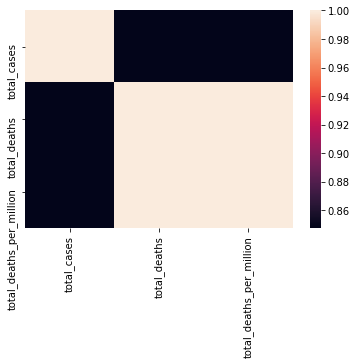

In [135]:
sns.heatmap(gbr1_0.corr())

<AxesSubplot:>

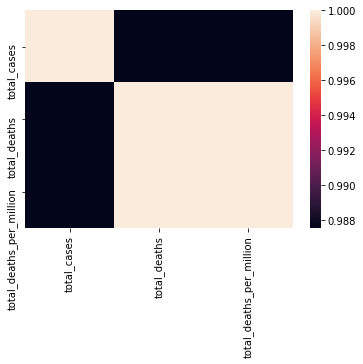

In [136]:
sns.heatmap(prt1_0.corr())

<AxesSubplot:>

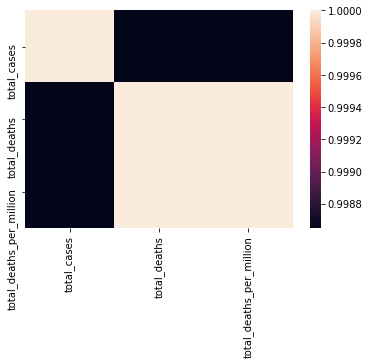

In [137]:
sns.heatmap(ven1_0.corr())

<AxesSubplot:>

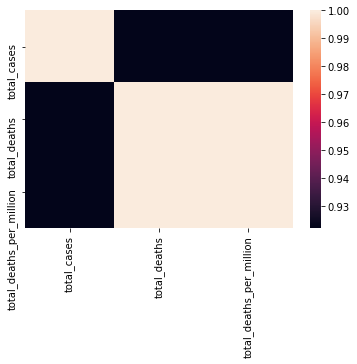

In [138]:
sns.heatmap(tur1_0.corr())

<AxesSubplot:>

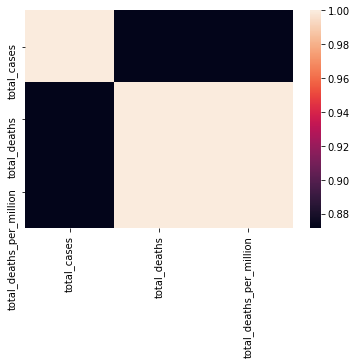

In [139]:
sns.heatmap(esp1_0.corr())

In [101]:
gbr_graph= gbr.drop(gbr.columns.difference(["date",'total_cases',"total_deaths"]), 1)
prt_graph= prt.drop(prt.columns.difference(["date",'total_cases',"total_deaths"]), 1)
ven_graph=ven.drop(ven.columns.difference(["date",'total_cases',"total_deaths"]), 1)
tur_graph=tur.drop(tur.columns.difference(["date",'total_cases',"total_deaths"]), 1)
esp_graph=esp.drop(esp.columns.difference(["date",'total_cases',"total_deaths"]), 1)

<AxesSubplot:>

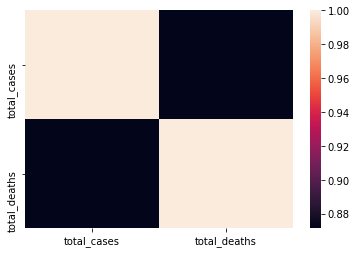

In [102]:
sns.heatmap(esp_graph.corr())

In [103]:
fig=px.line(gbr_graph, x= gbr_graph['date'], y=gbr_graph.columns, title= ' GBR covid deaths')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [104]:
fig=px.line(prt_graph, x= prt_graph['date'], y=prt_graph.columns, title= 'Portugal covid deaths')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [15]:
fig=px.line(ven_graph, x= ven_graph['date'], y=ven_graph.columns, title= 'Venezuela covid deaths')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [105]:
fig=px.line(tur_graph, x= tur_graph['date'], y=tur_graph.columns, title= 'Turkey covid deaths')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [106]:
fig=px.line(esp_graph, x= esp_graph['date'], y=esp_graph.columns, title= 'Turkey covid deaths')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

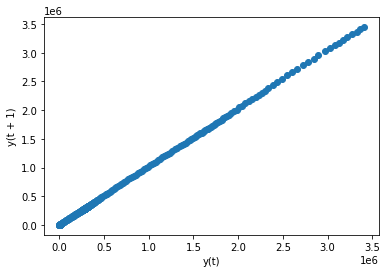

In [107]:

lag_plot(gbr_graph["total_cases"])
pyplot.show()

In [19]:
fig = px.scatter(gbr_graph, x=gbr_graph["date"], y=gbr_graph.columns, title="GBR covid point")
fig.show()

In [108]:
fig = px.scatter(prt_graph, x=prt_graph["date"], y=prt_graph.columns, title="Portugal covid point")
fig.show()

In [109]:
fig = px.scatter(ven_graph, x=ven_graph["date"], y=ven_graph.columns, title="Venezuela covid point")
fig.show()

In [110]:
fig = px.scatter(tur_graph, x=tur_graph["date"], y=tur_graph.columns, title="Turkey covid point")
fig.show()

In [23]:
fig = px.scatter(esp_graph, x=esp_graph["date"], y=esp_graph.columns, title="Spain covid point")
fig.show()

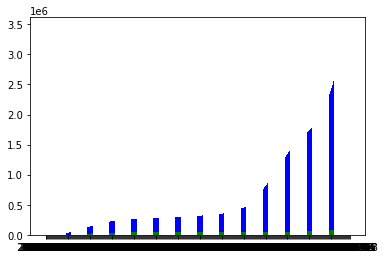

In [111]:
x = gbr["date"]
plt.bar(x, gbr["total_cases"], color='b', width= 0.25)
plt.bar(x, gbr["total_deaths"], color='g', width= 0.25)
plt.show()

In [141]:
gbr2_0= gbr.drop(gbr.columns.difference(["date",'new_cases',"new_deaths"]), 1)
gbr2_0.dropna( inplace= True)
gbr2_0

,date,new_cases,new_deaths
57264,2020-03-06,79.0,1.0
57265,2020-03-07,55.0,1.0
57266,2020-03-08,54.0,0.0
57267,2020-03-09,147.0,1.0
57268,2020-03-10,259.0,4.0
...,...,...,...
57578,2021-01-14,48804.0,1253.0
57579,2021-01-15,55885.0,1285.0
57580,2021-01-16,41428.0,1299.0
57581,2021-01-17,38670.0,682.0


In [142]:
fig=px.line(gbr2_0, x= gbr2_0['date'], y=gbr2_0.columns, title= ' GBR2.0 covid deaths')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [143]:
prt2_0= prt.drop(prt.columns.difference(["date",'new_cases',"new_deaths"]), 1)
prt2_0.dropna( inplace= True)
fig=px.line(prt2_0, x= prt2_0['date'], y=prt2_0.columns, title= 'Portugal covid deaths')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [144]:
ven2_0= ven.drop(ven.columns.difference(["date",'new_cases',"new_deaths"]), 1)
ven2_0.dropna( inplace= True)
fig=px.line(ven2_0, x= ven2_0['date'], y=ven2_0.columns, title= 'Ven2.0 covid deaths')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [145]:
tur2_0= tur.drop(tur.columns.difference(["date",'new_cases',"new_deaths"]), 1)
tur2_0.dropna( inplace= True)
fig=px.line(tur2_0, x= tur2_0['date'], y=tur2_0.columns, title= 'turkey2.0 covid deaths')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [146]:
esp2_0= esp.drop(esp.columns.difference(["date",'new_cases',"new_deaths"]), 1)
esp2_0.dropna( inplace= True)
fig=px.line(esp2_0, x= esp2_0['date'], y=esp2_0.columns, title= 'Esp2.0 covid deaths')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [121]:
gbr3_0= gbr.drop(gbr.columns.difference(["date",'total_cases','new_cases','total_deaths',"new_deaths"]), 1)
uk3_0.dropna( inplace= True)

In [122]:
fig=px.line(gbr3_0, x= gbr3_0['date'], y=gbr3_0.columns, title= ' UK3.0 covid deaths')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

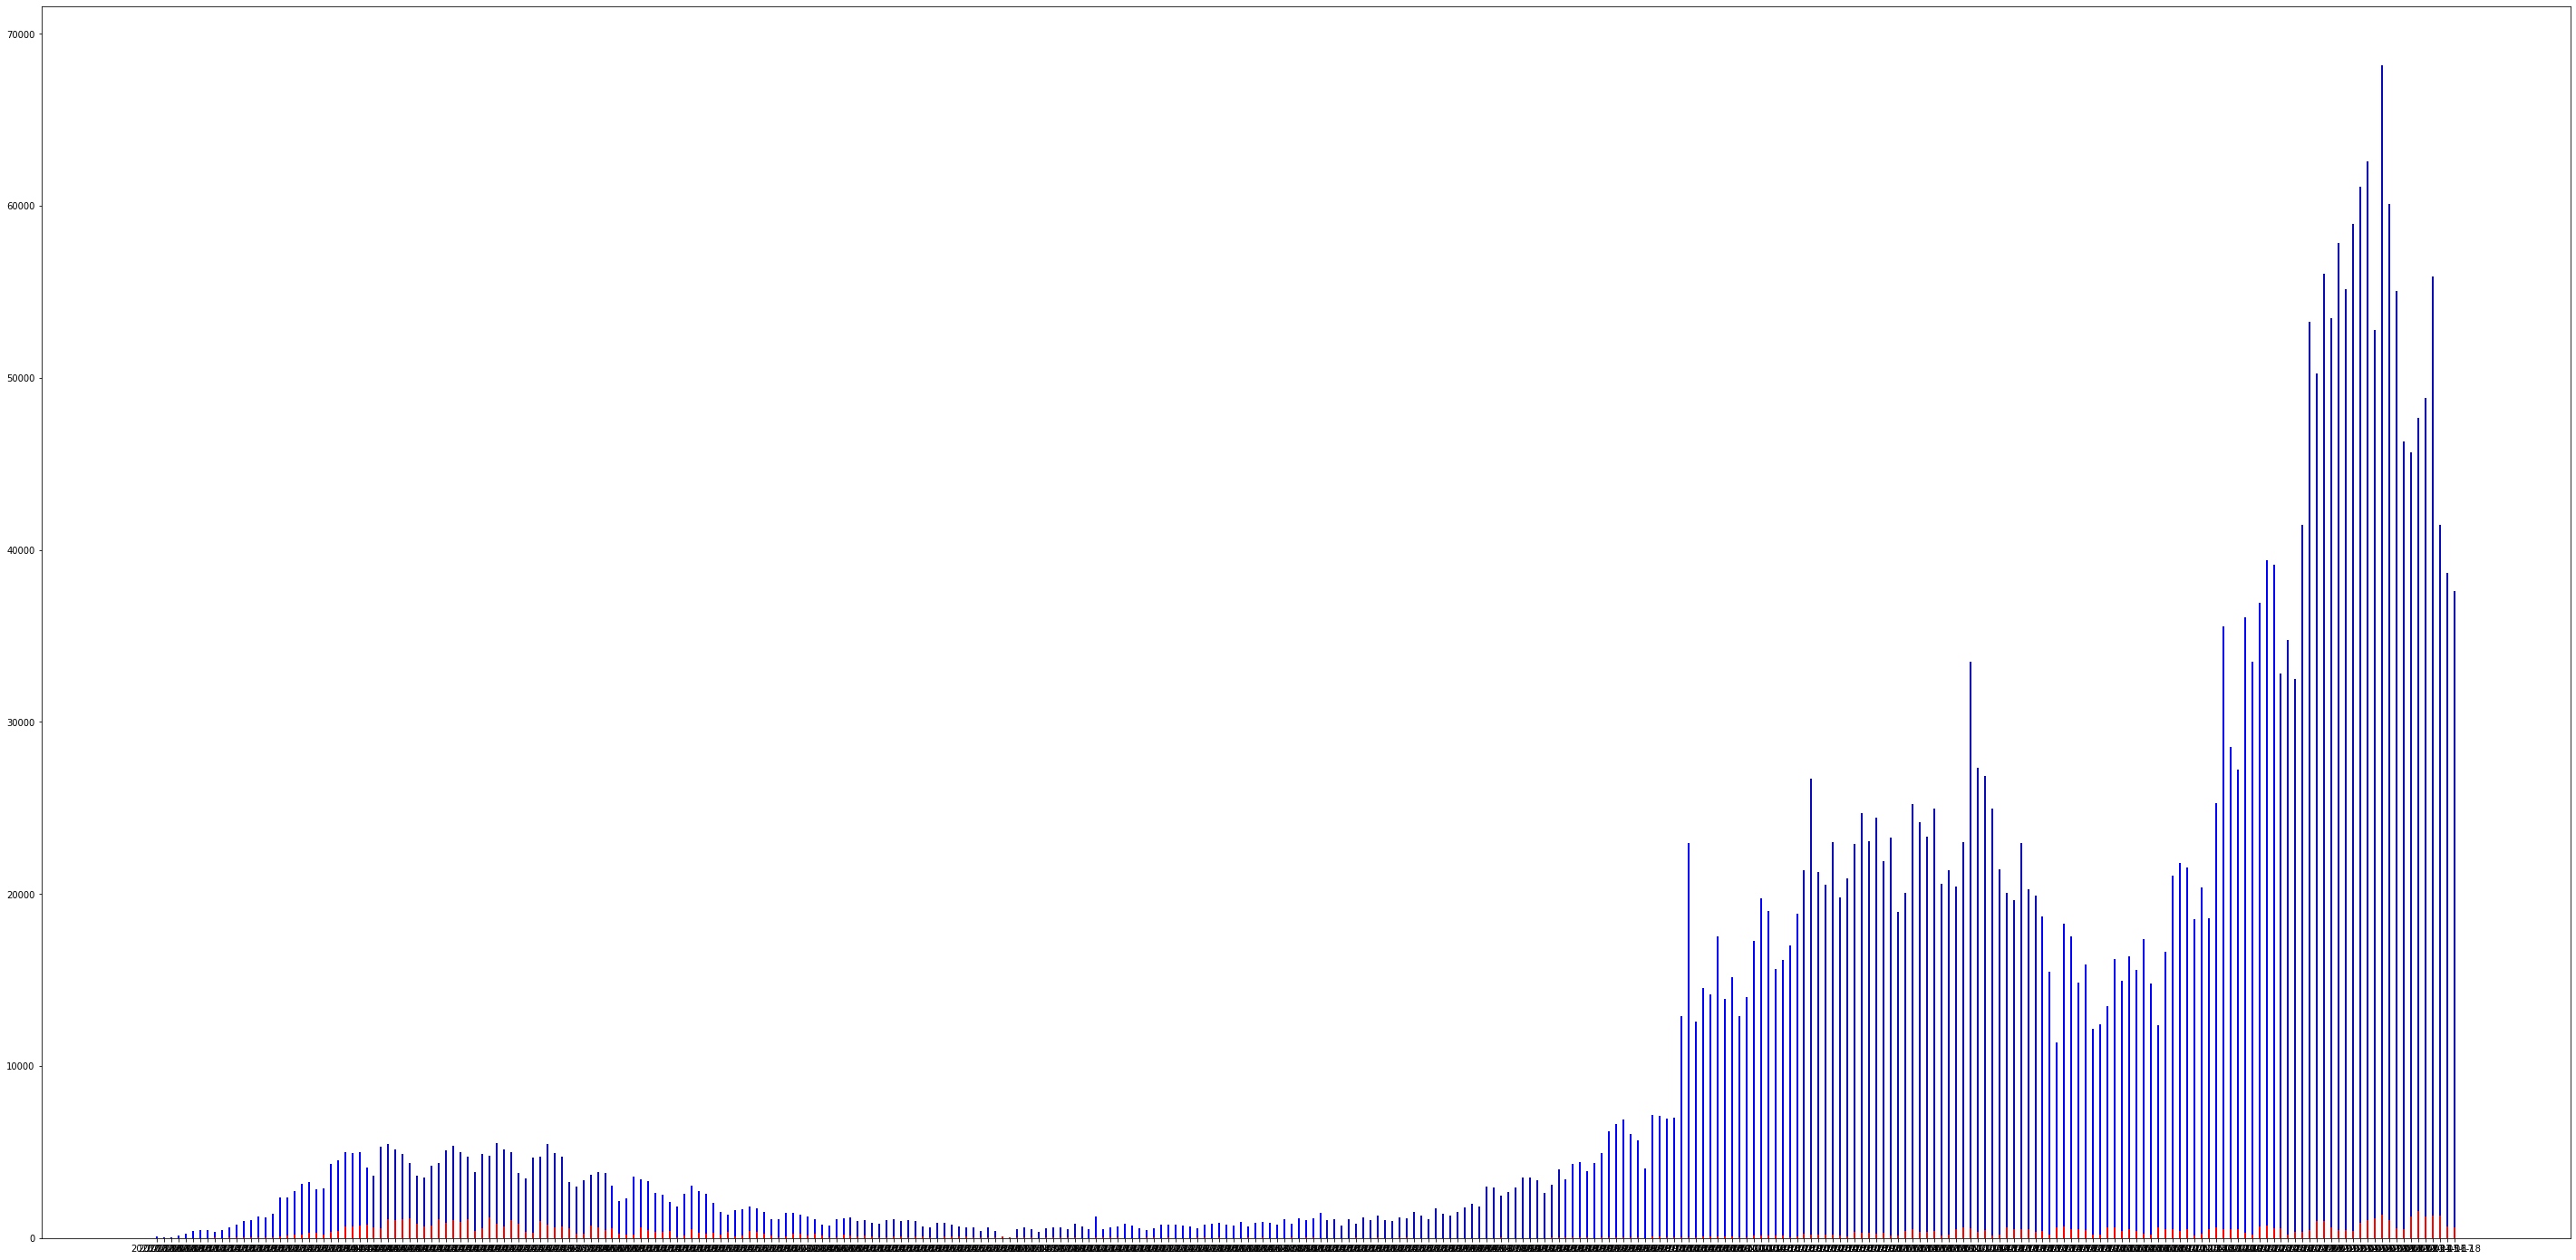

In [147]:
fig = plt.figure(figsize=(50, 25))
x = gbr2_0["date"]
plt.bar(x, gbr2_0["new_cases"], color='b', width= 0.25)
plt.bar(x, gbr2_0["new_deaths"], color='r', width= 0.25)
plt.show()

In [148]:
fig=px.bar(gbr2_0, x= gbr2_0['date'], y=gbr2_0.columns, title= ' UK2.0 covid deaths')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.update_layout( autosize=False,
    width=5000,
    height=500,
    margin=dict(l=0, r=0, t=0, b=0))
fig.show()

In [149]:
import plotly.graph_objects as go


In [150]:
fig = go.Figure(data=[
    go.Bar(name='cases', x=gbr2_0['date'], y=gbr2_0['new_cases']),
    go.Bar(name='deaths', x=gbr2_0['date'], y=gbr2_0['new_deaths'])])
# Change the bar mode
fig.update_layout( autosize=False,
    width=5000,
    height=500,
    margin=dict(l=0, r=0, t=0, b=0),
    )
fig.show()

In [151]:
fig = go.Figure(data=[
    go.Bar(name='cases', x=prt2_0['date'], y=prt2_0['new_cases']),
    go.Bar(name='deaths', x=prt2_0['date'], y=prt2_0['new_deaths'])])
# Change the bar mode
fig.update_layout( autosize=False,
    width=5000,
    height=500,
    margin=dict(l=0, r=0, t=0, b=0),
    )
fig.show()

In [152]:
fig = go.Figure(data=[
    go.Bar(name='cases', x=ven2_0['date'], y=ven2_0['new_cases']),
    go.Bar(name='deaths', x=ven2_0['date'], y=ven2_0['new_deaths'])])
# Change the bar mode
fig.update_layout( autosize=False,
    width=5000,
    height=500,
    margin=dict(l=0, r=0, t=0, b=0),
    )
fig.show()

In [153]:
fig = go.Figure(data=[
    go.Bar(name='cases', x=tur2_0['date'], y=tur2_0['new_cases']),
    go.Bar(name='deaths', x=tur2_0['date'], y=tur2_0['new_deaths'])])
# Change the bar mode
fig.update_layout( autosize=False,
    width=5000,
    height=500,
    margin=dict(l=0, r=0, t=0, b=0),
    )
fig.show()

In [154]:
fig = go.Figure(data=[
    go.Bar(name='cases', x=esp2_0['date'], y=esp2_0['new_cases']),
    go.Bar(name='deaths', x=esp2_0['date'], y=esp2_0['new_deaths'])])
# Change the bar mode
fig.update_layout( autosize=False,
    width=5000,
    height=500,
    margin=dict(l=0, r=0, t=0, b=0),
    )
fig.show()

In [87]:
from matplotlib.pyplot import pie, axis, show

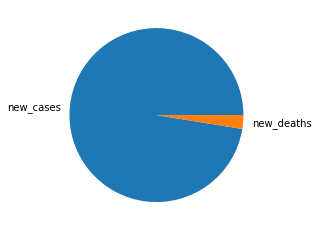

In [88]:
gbr_pie= []
gbr_pie.append(gbr2_0['new_cases'].mean())
gbr_pie.append(gbr2_0['new_deaths'].mean())
pie(gbr_pie, labels=['new_cases','new_deaths']);
show()

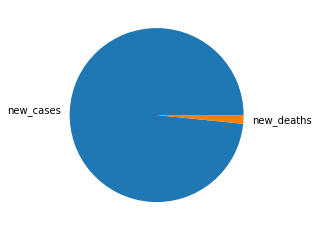

In [89]:
prt_pie= []
prt_pie.append(prt2_0['new_cases'].mean())
prt_pie.append(prt2_0['new_deaths'].mean())
pie(prt_pie, labels=['new_cases','new_deaths']);
show()

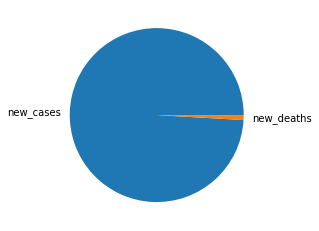

In [90]:
ven_pie= []
ven_pie.append(ven2_0['new_cases'].mean())
ven_pie.append(ven2_0['new_deaths'].mean())
pie(ven_pie, labels=['new_cases','new_deaths']);
show()

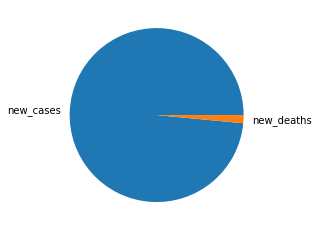

In [91]:
tur_pie= []
tur_pie.append(tur2_0['new_cases'].mean())
tur_pie.append(tur2_0['new_deaths'].mean())
pie(tur_pie, labels=['new_cases','new_deaths']);
show()

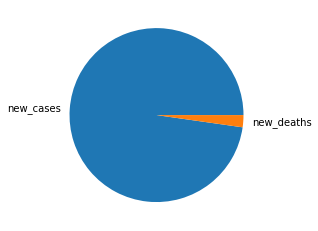

In [92]:
esp_pie= []
esp_pie.append(esp2_0['new_cases'].mean())
esp_pie.append(esp2_0['new_deaths'].mean())
pie(esp_pie, labels=['new_cases','new_deaths']);
show()

In [217]:
j = 51507265
x = 3854126
a = 46798076 
token = j+x+a
token

102159467

In [265]:
world1_0 = world.drop(['iso_code','continent','location','date', 'aged_65_older', 'tests_units'],1)

In [268]:

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return list(pairs_to_drop)

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

get_top_abs_correlations(df=world1_0, n=7)

new_cases           new_cases_smoothed     0.990803
new_cases_smoothed  total_deaths           0.977230
total_cases         total_deaths           0.976850
new_tests           new_tests_smoothed     0.974917
icu_patients        hosp_patients          0.974297
new_deaths          new_deaths_smoothed    0.973529
total_cases         new_cases_smoothed     0.973162
dtype: float64

In [276]:
world2_0 = world1_0.drop(world1_0.columns.difference(['new_cases', 'new_cases_smoothed','total_deaths', 'total_cases', 'new_tests', 'new_tests_smoothed', "icu_patients", 'hosp_patients','new_deaths', 'new_deaths_smoothed']), 1)
world2_0.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,icu_patients,hosp_patients,new_tests,new_tests_smoothed
total_cases,1.000000,0.961755,0.973162,0.976850,0.876415,0.900278,0.875851,0.878622,0.885099,0.904972
new_cases,0.961755,1.000000,0.990803,0.968055,0.931401,0.931890,0.882763,0.891497,0.858068,0.853352
new_cases_smoothed,0.973162,0.990803,1.000000,0.977230,0.920035,0.941983,0.901855,0.909241,0.858257,0.870741
total_deaths,0.976850,0.968055,0.977230,1.000000,0.915616,0.940858,0.871119,0.890468,0.845988,0.847131
new_deaths,0.876415,0.931401,0.920035,0.915616,1.000000,0.973529,0.915873,0.911308,0.700030,0.660230
new_deaths_smoothed,0.900278,0.931890,0.941983,0.940858,0.973529,1.000000,0.961996,0.953315,0.715992,0.709991
icu_patients,0.875851,0.882763,0.901855,0.871119,0.915873,0.961996,1.000000,0.974297,0.855432,0.873151
hosp_patients,0.878622,0.891497,0.909241,0.890468,0.911308,0.953315,0.974297,1.000000,0.854997,0.879989
new_tests,0.885099,0.858068,0.858257,0.845988,0.700030,0.715992,0.855432,0.854997,1.000000,0.974917
new_tests_smoothed,0.904972,0.853352,0.870741,0.847131,0.660230,0.709991,0.873151,0.879989,0.974917,1.000000


<AxesSubplot:>

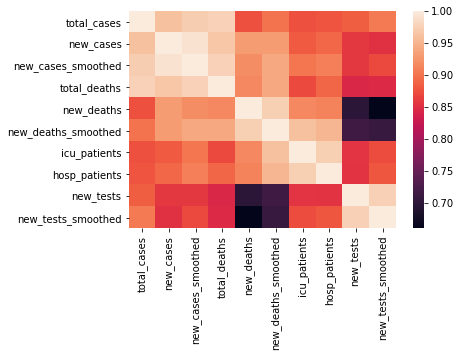

In [277]:
sns.heatmap(world2_0.corr())

In [279]:
gbr2_0

,date,new_cases,new_deaths
57264,2020-03-06,79.0,1.0
57265,2020-03-07,55.0,1.0
57266,2020-03-08,54.0,0.0
57267,2020-03-09,147.0,1.0
57268,2020-03-10,259.0,4.0
...,...,...,...
57578,2021-01-14,48804.0,1253.0
57579,2021-01-15,55885.0,1285.0
57580,2021-01-16,41428.0,1299.0
57581,2021-01-17,38670.0,682.0


In [283]:
gbr2_0['date']= pd.to_datetime(gbr2_0['date'])
gbr4_0=gbr2_0.groupby(pd.Grouper(key='date', freq='1M')).sum()
gbr4_0

,new_cases,new_deaths
date,,
2020-03-31,38520.0,2457.0
2020-04-30,139956.0,24297.0
2020-05-31,78768.0,10773.0
2020-06-30,27677.0,2952.0
2020-07-31,19577.0,795.0
2020-08-31,33290.0,315.0
2020-09-30,117763.0,644.0
2020-10-31,558947.0,4412.0
2020-11-30,618940.0,11900.0


In [286]:
fig=px.line(gbr4_0, x= gbr4_0.index, y=gbr4_0.columns, title= ' GBR4.0 covid deaths')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [285]:
gbr2_0['date']= pd.to_datetime(gbr2_0['date'])
gbr5_0=gbr2_0.groupby(pd.Grouper(key='date', freq='10D')).sum()
gbr5_0

,new_cases,new_deaths
date,,
2020-03-06,2782.0,43.0
2020-03-16,14766.0,661.0
2020-03-26,39929.0,4577.0
2020-04-05,44593.0,8854.0
2020-04-15,49324.0,8738.0
2020-04-25,41402.0,5692.0
2020-05-05,31722.0,4506.0
2020-05-15,22224.0,2968.0
2020-05-25,14765.0,2078.0


In [287]:
fig=px.line(gbr5_0, x= gbr5_0.index, y=gbr5_0.columns, title= ' GBR5.0 covid deaths')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [3]:
test2_0 = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [4]:
test2_0

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61658,ZWE,Africa,Zimbabwe,2021-01-18,27892.0,689.0,799.286,773.0,60.0,35.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
61659,ZWE,Africa,Zimbabwe,2021-01-19,28675.0,783.0,776.571,825.0,52.0,39.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
61660,ZWE,Africa,Zimbabwe,2021-01-20,29408.0,733.0,736.000,879.0,54.0,41.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
61661,ZWE,Africa,Zimbabwe,2021-01-21,30047.0,639.0,668.429,917.0,38.0,40.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [17]:
import threading
from threading import Thread

class ClassName():
    def __init__(self):
        self.world = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
        self.gbr = world[world["iso_code"]=="GBR"]
        self.prt = world[world["iso_code"]=="PRT"]
        self.ven = world[world["iso_code"]=="VEN"]
        self.tur = world[world["iso_code"]=="TUR"]
        self.esp = world[world["iso_code"]=="ESP"]
    def func1(self):
        gbr2_0= gbr.drop(gbr.columns.difference(["date",'new_cases',"new_deaths"]), 1)
        gbr2_0.dropna( inplace= True)
        prt2_0= prt.drop(prt.columns.difference(["date",'new_cases',"new_deaths"]), 1)
        prt2_0.dropna( inplace= True)
        ven2_0= ven.drop(ven.columns.difference(["date",'new_cases',"new_deaths"]), 1)
        ven2_0.dropna( inplace= True)
        tur2_0= tur.drop(tur.columns.difference(["date",'new_cases',"new_deaths"]), 1)
        tur2_0.dropna( inplace= True)
        esp2_0= esp.drop(esp.columns.difference(["date",'new_cases',"new_deaths"]), 1)
        esp2_0.dropna( inplace= True)
        return (esp2_0, tur2_0, ven2_0, prt2_0, gbr2_0) 

    def func2(self):
        fig_gbr=px.line(gbr2_0, x= gbr2_0['date'], y=gbr2_0.columns, title= 'gbr2.0 covid deaths')
        fig_gbr.update_xaxes(
        dtick="M1",
        tickformat="%b\n%Y")
        fig_gbr.show()
        fig_prt=px.line(prt2_0, x= prt2_0['date'], y=prt2_0.columns, title= 'prt2.0 covid deaths')
        fig_prt.update_xaxes(
        dtick="M1",
        tickformat="%b\n%Y")
        fig_prt.show()
        fig_ven=px.line(ven2_0, x= ven2_0['date'], y=ven2_0.columns, title= 'ven2.0 covid deaths')
        fig_ven.update_xaxes(
        dtick="M1",
        tickformat="%b\n%Y")
        fig_ven.show()
        fig_tur=px.line(tur2_0, x= tur2_0['date'], y=tur2_0.columns, title= 'tur2.0 covid deaths')
        fig_tur.update_xaxes(
        dtick="M1",
        tickformat="%b\n%Y")
        fig_tur.show()
        fig_esp=px.line(esp2_0, x= esp2_0['date'], y=esp2_0.columns, title= 'esp2.0 covid deaths')
        fig_esp.update_xaxes(
        dtick="M1",
        tickformat="%b\n%Y")
        fig_esp.show()
        

    def runall(self):
        if __name__ == '__main__':
            Thread(target = self.func1).start()
            Thread(target = self.func2).start()
run = ClassName()
run.runall()

Exception in thread Thread-7:
Traceback (most recent call last):
  File "C:\Users\javig\AppData\Local\Programs\Python\Python39\lib\threading.py", line 950, in _bootstrap_inner
    self.run()
  File "C:\Users\javig\AppData\Local\Programs\Python\Python39\lib\threading.py", line 888, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-17-f4f82faef822>", line 26, in func2
NameError: name 'gbr2_0' is not defined


In [24]:
import threading
from threading import Thread

class ClassName():
    def __init__(self):
        self.world = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
        self.gbr = world[world["iso_code"]=="GBR"]

    def func1(self):
        gbr2_0= gbr.drop(gbr.columns.difference(["date",'new_cases',"new_deaths"]), 1)
        gbr2_0.dropna( inplace= True)
        fig_gbr=px.line(gbr2_0, x= gbr2_0['date'], y=gbr2_0.columns, title= 'gbr2.0 covid deaths')
        fig_gbr.update_xaxes(dtick="M1", tickformat="%b\n%Y")
        x = fig_gbr.show()
        return x

    def runall(self):
        if __name__ == '__main__':
            Thread(target = self.func1).start()
run = ClassName()
run.runall()

In [ ]:
from functools import wraps
from datetime import datetime
import math
import time

def decorator_v2(timed):
    def real_decorator(function):
        @wraps(function)
        def wrapper(*args, **kwargs):
            if timed:
                begin_2 = datetime.now()
                print("begin_2:", begin_2)
            retval = function(*args, **kwargs)
            if timed:
                end_2 = datetime.now()
                print("end_2:", end_2)
                print("--------------")
                print("With datetime:")
                print("Total datetime: ", end_2 - begin_2, " seconds") 
            return retval
        return wrapper
    return real_decorator

@decorator_v2(timed=True)
def fact():
    world = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
    paises = ['GBR', 'PRT', 'VEN', 'TUR', 'ESP']
    df = world[world["iso_code"].isin(paises)]
    df =df.dropna(subset=["total_deaths"])
    t_d_averages = df.groupby(by="date" ).agg({'total_deaths':'mean'})
    t_d_averages= t_d_averages.reset_index()
    t_d_averages = t_d_averages['date'].astype(str)
    t_d_averages = t_d_averages.values.tolist() 
    jsonpaalex = {"t_d_averages":t_d_averages}
    with open("t_d_averages.json", "w") as write_file:
        json.dump(jsonpaalex, write_file)
    return t_d_averages.json